In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
sklearn.__version__

'1.3.0'

In [2]:
import csv
df = pd.read_csv('./bank/bank-full.csv', sep=';')

In [3]:
import matplotlib
%matplotlib inline

In [4]:
# below javascript: make the plot window larger

In [5]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [6]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## no null data in df (but there are "unknown" categories)

In [8]:
train, test = train_test_split(df, test_size=0.2, random_state=23)

In [9]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9419,36,unemployed,married,secondary,no,1453,no,no,unknown,6,jun,386,1,-1,0,unknown,no
26837,31,admin.,married,secondary,no,2304,yes,no,cellular,20,nov,257,2,-1,0,unknown,no
25178,57,management,divorced,tertiary,no,236,no,no,cellular,18,nov,120,2,-1,0,unknown,no
17148,31,entrepreneur,married,tertiary,no,5156,yes,no,cellular,28,jul,147,3,-1,0,unknown,no
17412,38,blue-collar,single,unknown,no,-933,yes,no,cellular,28,jul,149,11,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,39,technician,single,unknown,no,75,no,no,unknown,6,jun,26,1,-1,0,unknown,no
11190,55,blue-collar,married,primary,no,761,no,no,unknown,18,jun,67,1,-1,0,unknown,no
26569,39,management,married,tertiary,no,2450,no,no,cellular,20,nov,382,2,-1,0,unknown,no
9256,51,technician,married,primary,no,223,yes,no,unknown,5,jun,131,3,-1,0,unknown,no


In [10]:
# get the columns, non-null count, and Dtype
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 9419 to 41555
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.0+ MB


In [11]:
# describe the numeric features: count, mean, std, min, max, percentiles
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,40.918768,1357.402372,15.818348,257.184638,2.775630,40.386889,0.580900
std,10.634546,3050.468682,8.335164,255.383308,3.130953,100.337503,2.399685
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,179.000000,2.000000,-1.000000,0.000000
75%,48.000000,1423.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,854.000000,275.000000


In [12]:
# get a summary of previous info using skimpy
from skimpy import skim
skim(train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 36168  │ │ string      │ 10    │                                                          │
│ │ Number of columns │ 17     │ │ int64       │ 7     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0       ┃ p25   ┃ p75     ┃ p100      ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ age               │    0 │       0 │      41 │      11 │       18 │    33 │      48 │        95 │   ▃█▅▁   │  │
│ │ balance           │    0 │       0 │    1400 │    3100 │    -8000 │    73 │    1400 │    100000 │    █     │  │
│ │ day               │    0 │       0 │      16 │     8.3 │        1 │     8 │      21 │        31 │  ▅▆▆█▄▆  │  │
│ │ duration          │    0 │       0 │     260 │     260 │        0 │   100 │     320 │      4900 │    █     │  │
│ │ campaign          │    0 │       0 │     2.8 │     3.1 │        1 │     1 │       3 │        63 │    █     │  │
│ │ pdays             │    0 │       0 │      40 │     100 │       -1 │    -1 │      -1 │       850 │   █▁▁    │  │
│ │ previous          │    0 │       0 │    0.58 │     2.4 │        0 │     0 │       0 │       280 │    █     │  │
│ └───────────────────┴──────┴─────────┴─────────┴─────────┴──────────┴───────┴─────────┴───────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ job                       │       0 │          0 │                            1 │                    36168 │  │
│ │ marital                   │       0 │          0 │                            1 │                    36168 │  │
│ │ education                 │       0 │          0 │                            1 │                    36168 │  │
│ │ default                   │       0 │          0 │                            1 │                    36168 │  │
│ │ housing                   │       0 │          0 │                            1 │                    36168 │  │
│ │ loan                      │       0 │          0 │                            1 │                    36168 │  │
│ │ contact                   │       0 │          0 │                            1 │                    36168 │  │
│ │ month                     │       0 │          0 │                            1 │                    36168 │  │
│ │ poutcome                  │       0 │          0 │                            1 │                    36168 │  │
│ │ y                         │       0 │          0 │                            1 │                    36168 │  │
│ └───────────────────────────┴─────────┴────────────┴──

## 7 numeric variables, 9 categorical variables

In [13]:
# column names
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
# separate numeric variables and categorical variables
from pandas.api.types import is_numeric_dtype, is_string_dtype
num_cols = []
cat_cols = []
for col in train.columns:
    if is_numeric_dtype(train[col]):
        num_cols.append(col)
    elif is_string_dtype(train[col]):
        cat_cols.append(col)
        
print(num_cols)
cat_cols.remove('y')
print(cat_cols)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [15]:
# get a summary of y
train.y.value_counts()

y
no     31952
yes     4216
Name: count, dtype: int64

In [16]:
train.age

9419     36
26837    31
25178    57
17148    31
17412    38
         ..
9704     39
11190    55
26569    39
9256     51
41555    46
Name: age, Length: 36168, dtype: int64

In [17]:
train['y_num'] = train.y.map(lambda x: 1 if x=='yes' else 0)


# problem: find potential customers and do phone call campaign. 
# target: do better than random guess, which yields base rate: 0.117
# metric: precision, pr_auc
# ideal results: precision better than base rate

In [18]:
# A. use numeric variables, ML method: logistic regression. 
# goal:  see if with only numeric variables, whether precision can be better than base rate.

In [19]:
# use half of train data, further split into train and test data set. 
train_half = train.sample(frac=0.5, random_state=89)
train_sample1, test_sample1 = train_test_split(train_half, test_size=0.2, random_state=23)





In [20]:
# A. with numeric variables
# A1.  use part of train data, do Logistic regression.  hyperparameters: class_balance, 
# A2. use all of train data, do gridsearchCV.


In [21]:
features = num_cols
target = 'y_num'

X_train = train_sample1[features]
y_train = train_sample1[target]

X_test = test_sample1[features]
y_test = test_sample1[target]

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, auc, precision_score, recall_score, f1_score, classification_report, confusion_matrix, accuracy_score, precision_recall_curve

In [36]:
steps = [
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(
        class_weight='balanced', 
        random_state=12, n_jobs=-1, max_iter=200))
]

#model = LogisticRegression(class_weight='balanced', random_state=12, n_jobs=-1, max_iter=200)
model = Pipeline(steps)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [37]:
y_test_proba = model.predict_proba(X_test)
y_test_proba1 = y_test_proba[ :, 1 ]
precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)
auc_prc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_test_proba1)
print(auc_prc, roc_auc)

0.42688181546131715 0.8360383757920451


In [38]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87     12792
           1       0.32      0.70      0.44      1675

    accuracy                           0.80     14467
   macro avg       0.64      0.76      0.66     14467
weighted avg       0.88      0.80      0.82     14467

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      3181
           1       0.33      0.68      0.44       436

    accuracy                           0.79      3617
   macro avg       0.64      0.74      0.66      3617
weighted avg       0.87      0.79      0.82      3617



## looks promising, 
## with balanced class: the simple Logistic regression model with only numeric variables yield precision score for testing data: 0.33 (recall: 0.68), which is 2.6 times the base rate. 

## with unbalanced class: test precision 0.63, recall 0.18.  precision is 5.4 times better than base rate. 

In [39]:
model.feature_names_in_

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous'], dtype=object)

In [40]:
model['lr'].coef_[0, :] #Coefficient of the features in the decision function.

array([ 0.06521732,  0.24247998, -0.08070519,  1.26988948, -0.33287536,
        0.20444995,  0.38714895])

Text(0, 0.5, 'model coefs')

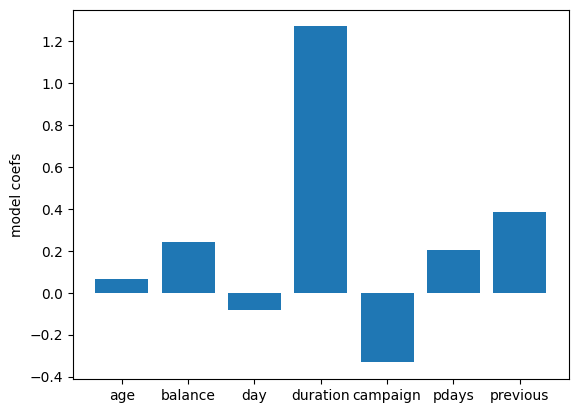

In [41]:
from matplotlib.pylab import plt
plt.bar(range(len(model['lr'].coef_[0, :])), model['lr'].coef_[0, :]) 
plt.xticks(range(len(model['lr'].coef_[0, :])), model.feature_names_in_)
plt.ylabel('model coefs')

In [42]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print(tn, fp, fn, tp)
total_p = tp + fp
print(total_p)

10333 2459 498 1177
3636


# unbalanced class
print(tn, fp, fn, tp)
total_p = tp + fp
print(total_p)

12578 214 1364 311
525
# balanced class
10333 2459 498 1177
3636

## duration, campaign, and previous are most important features, age and day are the least. 
## can remove day,   remove age or make age -> age group.

In [43]:
# B. with categorical variables
# B1.  use part of train data, do Logistic regression.  hyperparameters: class_balance, 
# B2. use all of train data, do gridsearchCV.



In [44]:
train_sample1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
40112,57,technician,divorced,tertiary,no,126,no,no,telephone,4,jun,166,2,-1,0,unknown,yes,1
34747,51,entrepreneur,married,unknown,no,2396,yes,no,cellular,6,may,241,2,-1,0,unknown,no,0
35578,57,technician,married,secondary,no,3071,yes,yes,cellular,7,may,63,3,-1,0,unknown,no,0
37909,49,management,divorced,tertiary,no,1253,yes,no,cellular,14,may,83,2,-1,0,unknown,no,0
29038,58,blue-collar,divorced,secondary,no,1103,yes,no,cellular,2,feb,226,1,202,4,failure,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29763,38,management,single,tertiary,no,175,yes,yes,cellular,4,feb,139,5,-1,0,unknown,no,0
43961,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes,1
36889,45,self-employed,divorced,tertiary,no,963,yes,no,cellular,12,may,528,5,-1,0,unknown,yes,1
25108,59,blue-collar,married,primary,no,0,no,no,cellular,18,nov,167,2,-1,0,unknown,no,0


In [45]:
#from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder, CountEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [46]:
## build a transformer to transform all the categorical variables, and pipeline the ML algorithm including this transformer

In [47]:
class RawDataTransformer(object):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X1 = X.copy()
        
        #ordinal encoding for binary: yes-1, no-0
        le_cols = ['default', 'housing', 'loan']
        for col in le_cols:
            X1[col+'_le'] = X1[col].map(self.num_yes_no)
            X1 = X1.drop([col], axis=1)
        
        #One-hot-encoding:
        ohe_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
        for col in ohe_cols:
            ohe = OneHotEncoder()
            transformed = ohe.fit_transform(X1[[col]])
            X1[col + '_' + ohe.categories_[0]] = transformed.toarray()
            X1 = X1.drop([col], axis=1)  
            
      #  X1 = X1.drop(['y', 'y_num'], axis=1)
        return X1


    def num_yes_no(self, x):
        if x=='yes':
            return 1
        else:
            return 0
        
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [48]:
train_sample2 = train_sample1.copy()
#train_sample2.drop(['job'], axis=1)
train_sample2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
40112,57,technician,divorced,tertiary,no,126,no,no,telephone,4,jun,166,2,-1,0,unknown,yes,1
34747,51,entrepreneur,married,unknown,no,2396,yes,no,cellular,6,may,241,2,-1,0,unknown,no,0
35578,57,technician,married,secondary,no,3071,yes,yes,cellular,7,may,63,3,-1,0,unknown,no,0
37909,49,management,divorced,tertiary,no,1253,yes,no,cellular,14,may,83,2,-1,0,unknown,no,0
29038,58,blue-collar,divorced,secondary,no,1103,yes,no,cellular,2,feb,226,1,202,4,failure,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29763,38,management,single,tertiary,no,175,yes,yes,cellular,4,feb,139,5,-1,0,unknown,no,0
43961,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes,1
36889,45,self-employed,divorced,tertiary,no,963,yes,no,cellular,12,may,528,5,-1,0,unknown,yes,1
25108,59,blue-collar,married,primary,no,0,no,no,cellular,18,nov,167,2,-1,0,unknown,no,0


In [49]:
transformed2 = RawDataTransformer().fit_transform(train_sample2)
transformed2.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'y_num', 'default_le', 'housing_le', 'loan_le', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [50]:
# raw features, target
raw_features = cat_cols
target = 'y_num'

X_train = train_sample1[raw_features]
y_train = train_sample1[target]

X_test = test_sample1[raw_features]
y_test = test_sample1[target]

In [51]:
steps = [
    ('rdt', RawDataTransformer()),
    ('lg', LogisticRegression(
        #class_weight='balanced', 
        random_state=14, n_jobs=-1)),
]

model=Pipeline(steps)

In [52]:
model.fit(X_train, y_train)

Pipeline(steps=[('rdt', <__main__.RawDataTransformer object at 0x13e6741f0>),
                ('lg', LogisticRegression(n_jobs=-1, random_state=14))])

In [53]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [54]:
y_test_proba = model.predict_proba(X_test)
y_test_proba1 = y_test_proba[ :, 1 ]
precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)
auc_prc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_test_proba1)
print(auc_prc, roc_auc)

0.41350758213818944 0.7570465695110591


In [55]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12792
           1       0.65      0.16      0.25      1675

    accuracy                           0.89     14467
   macro avg       0.77      0.57      0.60     14467
weighted avg       0.87      0.89      0.86     14467

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3181
           1       0.67      0.17      0.27       436

    accuracy                           0.89      3617
   macro avg       0.78      0.58      0.61      3617
weighted avg       0.87      0.89      0.86      3617



## Not using balanced class, the simple Logistic regression model with only numeric variables yield precision score for testing data: 0.67 (recall: 0.17), which is 6 times the base rate.  
## using balanced class: test_precision 0.26, recall 0.63.  Likely a lot more positive predictions.

In [56]:
model['lg'].feature_names_in_

array(['default_le', 'housing_le', 'loan_le', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [57]:
model['lg'].coef_[0, :] #Coefficient of the features in the decision function.

array([-0.23366586, -0.50592129, -0.41078228, -0.01573968, -0.14661335,
       -0.46274593, -0.38466733,  0.12666041,  0.58331894,  0.01036241,
       -0.12446776,  0.47070939,  0.00490513,  0.19105309, -0.24907927,
       -0.03161368, -0.163872  ,  0.19918173, -0.14576782, -0.00571272,
        0.05615163,  0.09902496,  0.49279014,  0.25293703, -0.74203112,
        0.22949894, -0.7098326 ,  0.53259373, -0.20280566, -0.6973276 ,
       -0.43041423,  0.09730061,  1.11512477, -0.40673017, -0.68038555,
        0.53157719,  0.6250966 , -0.62171356, -0.41197443,  1.58650691,
       -0.54912288])

Text(0.5, 1.0, 'categorical variables')

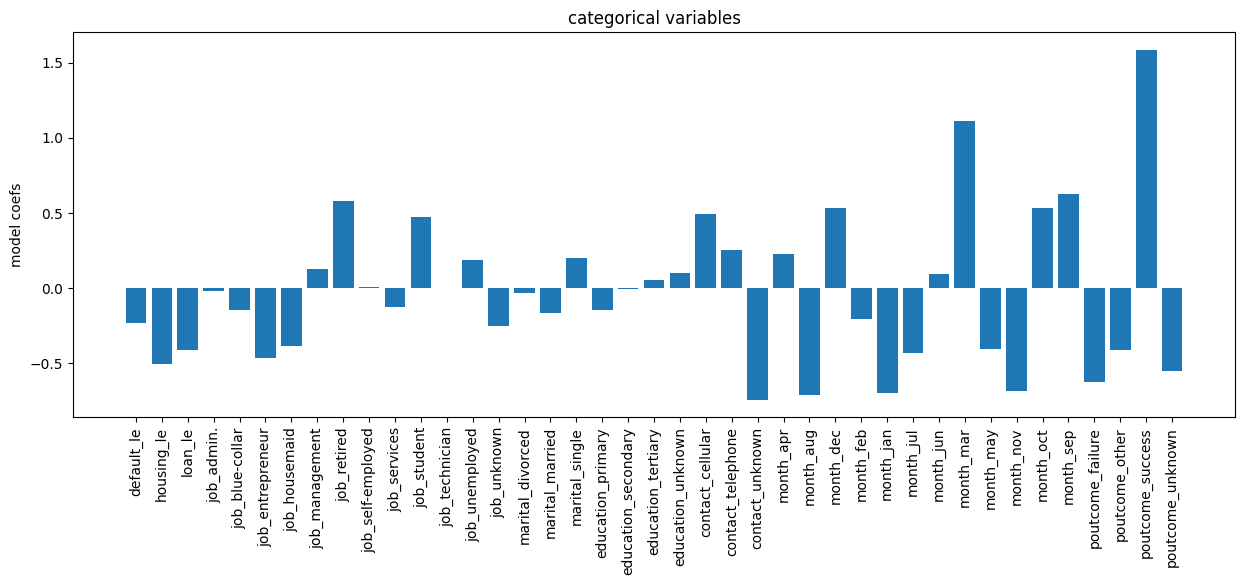

In [58]:
from matplotlib.pylab import plt
fig = plt.figure(figsize=(15,5))
plt.bar(range(len(model['lg'].coef_[0, :])), model['lg'].coef_[0, :]) 
plt.xticks(range(len(model['lg'].coef_[0, :])), model['lg'].feature_names_in_, rotation=90)
plt.ylabel('model coefs')
plt.title('categorical variables')

In [59]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print(tn, fp, fn, tp)
total_p = tp + fp
print(total_p)

12649 143 1410 265
408


# unbalanced class
print(tn, fp, fn, tp)
total_p = tp + fp
print(total_p)

12649 143 1410 265
408

# balanced class
9648 3144 608 1067
4211

# -- adding both numeric and categorical variables

In [60]:
# raw features, target
raw_features = cat_cols + num_cols
target = 'y_num'

X_train = train_sample1[raw_features]
y_train = train_sample1[target]

X_test = test_sample1[raw_features]
y_test = test_sample1[target]

In [61]:
steps = [
    ('rdt', RawDataTransformer()),
    ('scale', StandardScaler()),
    ('lg', LogisticRegression(
        class_weight='balanced', 
        random_state=15, n_jobs=-1, max_iter=200)),
]

model=Pipeline(steps)

In [62]:
model.fit(X_train, y_train)



Pipeline(steps=[('rdt', <__main__.RawDataTransformer object at 0x13f521e40>),
                ('scale', StandardScaler()),
                ('lg',
                 LogisticRegression(class_weight='balanced', max_iter=200,
                                    n_jobs=-1, random_state=15))])

In [63]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [64]:
model['lg'].n_features_in_


48

In [65]:
columns = model['rdt'].transform(X_train, y_train).columns
columns.size

48

In [66]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     12792
           1       0.42      0.83      0.55      1675

    accuracy                           0.85     14467
   macro avg       0.70      0.84      0.73     14467
weighted avg       0.91      0.85      0.87     14467

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3181
           1       0.43      0.81      0.57       436

    accuracy                           0.85      3617
   macro avg       0.70      0.83      0.74      3617
weighted avg       0.91      0.85      0.87      3617



In [67]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print(tn, fp, fn, tp)
total_p = tp + fp
print(total_p)

10845 1947 284 1391
3338


In [68]:
y_test_proba = model.predict_proba(X_test)
y_test_proba1 = y_test_proba[ :, 1 ]

In [69]:
import numpy as np
thresholds = np.arange(0.01, 1.0, 0.02)
result=[]
for threshold in thresholds:
    mask = y_test_proba1 > threshold
    y_test_pred1 = list(map(int, mask))
    precision = precision_score(y_test, y_test_pred1)
    recall = recall_score(y_test, y_test_pred1)
    f1 = f1_score(y_test, y_test_pred1)
    accuracy = accuracy_score(y_test, y_test_pred1)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred1).ravel()
    total_p = tp + fp
    frac_pp = total_p/len(y_test)
    result.append([threshold, precision, recall, f1, accuracy, frac_pp, total_p, tp])

print(np.array(result))
result = np.array(result).T



[[1.00000000e-02 1.22026308e-01 1.00000000e+00 2.17510601e-01
  1.32706663e-01 9.87835223e-01 3.57300000e+03 4.36000000e+02]
 [3.00000000e-02 1.32702868e-01 9.97706422e-01 2.34248788e-01
  2.13713022e-01 9.06275919e-01 3.27800000e+03 4.35000000e+02]
 [5.00000000e-02 1.45010047e-01 9.93119266e-01 2.53068381e-01
  2.93337020e-01 8.25546033e-01 2.98600000e+03 4.33000000e+02]
 [7.00000000e-02 1.56465049e-01 9.90825688e-01 2.70253363e-01
  3.54990323e-01 7.63339784e-01 2.76100000e+03 4.32000000e+02]
 [9.00000000e-02 1.68495298e-01 9.86238532e-01 2.87817938e-01
  4.11667127e-01 7.05557092e-01 2.55200000e+03 4.30000000e+02]
 [1.10000000e-01 1.82900893e-01 9.86238532e-01 3.08575529e-01
  4.67238043e-01 6.49986176e-01 2.35100000e+03 4.30000000e+02]
 [1.30000000e-01 1.94911404e-01 9.83944954e-01 3.25369738e-01
  5.08155930e-01 6.08515344e-01 2.20100000e+03 4.29000000e+02]
 [1.50000000e-01 2.11956522e-01 9.83944954e-01 3.48780488e-01
  5.57091512e-01 5.59579762e-01 2.02400000e+03 4.29000000e+02]


Text(0.5, 1.0, 'test data')

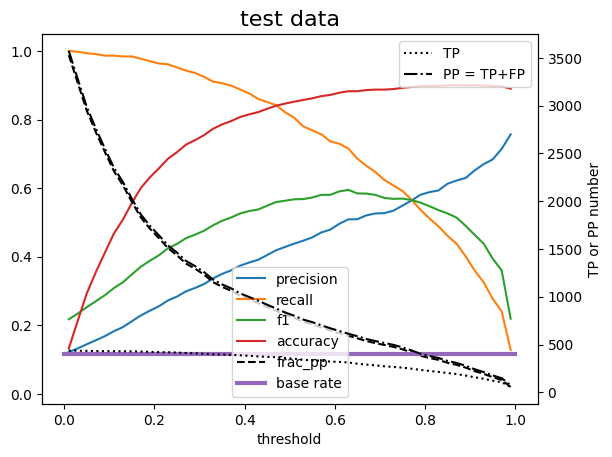

In [70]:
fig = plt.figure()
ax1 = plt.subplot(111)

ax1.plot(result[0], result[1], label='precision')
ax1.plot(result[0], result[2], label='recall')
ax1.plot(result[0], result[3], label='f1')
ax1.plot(result[0], result[4], label='accuracy')
ax1.plot(result[0], result[5], label='frac_pp', ls='--', c='black')
ax1.plot([0, 1], [0.117, 0.117], lw=3, label = 'base rate')

ax2 = ax1.twinx()
ax2.plot(result[0], result[7], label='TP', c='black', ls=':')
ax2.plot(result[0], result[6], label='PP = TP+FP', c='black', ls='-.')



ax1.legend()
ax2.legend()


ax1.set_xlabel('threshold')
ax2.set_ylabel('TP or PP number')


plt.title('test data',fontsize=16)

# deliver to product manager:  a list of leads with ranked proba. Note that Only classifiers that give probabilities can do this.  when Not using "balanced class", Or if a list of fixed size N is needed, then choose the top N items, the precision can be read from this figure. e.g. if N=500, then use PP=500, find the threshold of 0.23, the precision is ~0.55, much higher than the base rate 0.12. recall: 0.62.
[2.30000000e-01 5.46747967e-01 6.16972477e-01 5.79741379e-01
  8.92175836e-01 1.36024330e-01 4.92000000e+02 2.69000000e+02]


# when using "balanced class", if needing N=500, then use PP=500, find the threshold of 0.73, the precision is ~0.53, much higher than the base rate 0.12.  recall ~ 0.61. 
[7.30000000e-01 5.34274194e-01 6.07798165e-01 5.68669528e-01
  8.88858170e-01 1.37130218e-01 4.96000000e+02 2.65000000e+02]
  
# using balanced or imbalanced don't change the conclusion, but may change the threshold used. 

Text(0.5, 1.0, 'Precision-Recall curve, AUC_PRC=0.572')

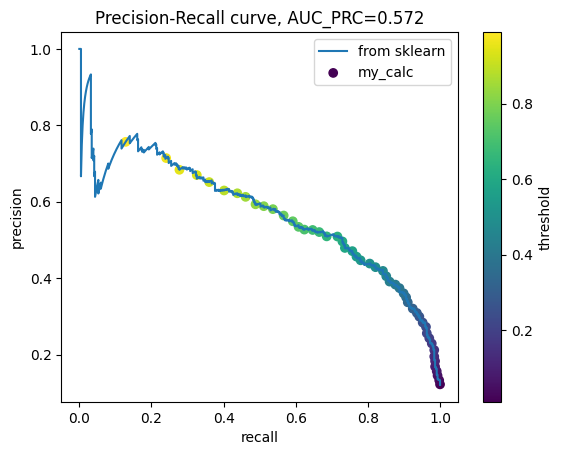

In [71]:
from sklearn.metrics import auc, precision_recall_curve

fig = plt.figure()
precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)


plt.plot(recall, precision, label='from sklearn')
sc = plt.scatter( result[2], result[1], c=result[0], label='my_calc')
cb = fig.colorbar(sc, label='threshold')

auc_prc = auc(recall, precision)

plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall curve, AUC_PRC=' + str(round(auc_prc,3)) )

In [72]:
# ROC_AUC:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_test_proba1)

Text(0.5, 1.0, 'ROC: Receiver Operating Characteristic, ROC_AUC:0.909')

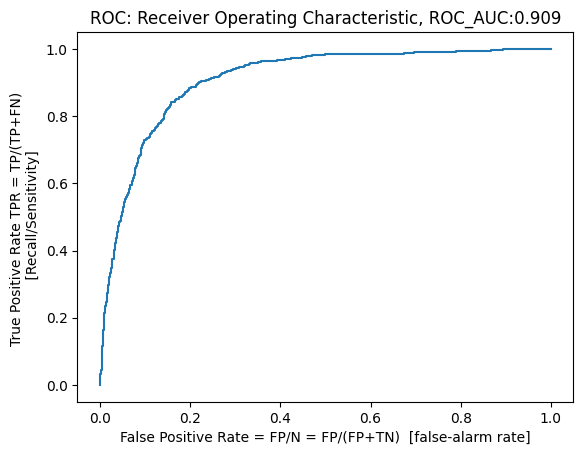

In [73]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = FP/N = FP/(FP+TN)  [false-alarm rate]')
plt.ylabel('True Positive Rate TPR = TP/(TP+FN) \n [Recall/Sensitivity]')
plt.title('ROC: Receiver Operating Characteristic, ROC_AUC:'+ str(round(roc_auc,3)))

# Note:  ROC_AUC may not be very sensitive for imbalanced data, use PRC_AUC.

Text(0.5, 1.0, 'all variables')

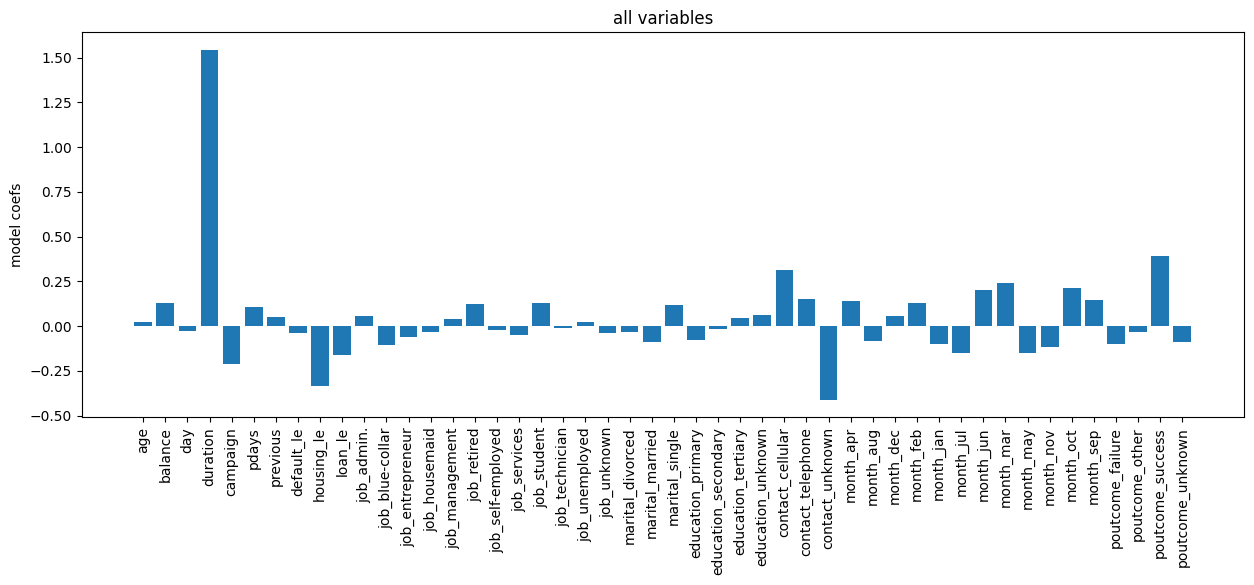

In [74]:
from matplotlib.pylab import plt
fig = plt.figure(figsize=(15,5))
plt.bar(range(len(model['lg'].coef_[0, :])), model['lg'].coef_[0, :]) 
plt.xticks(range(len(model['lg'].coef_[0, :])), columns, rotation=90)
plt.ylabel('model coefs')
plt.title('all variables')

In [75]:
# make a dataframe of the features, with their feature importance.
feature_importance = pd.DataFrame({'features': columns, 'coefs': model['lg'].coef_[0, :]})
feature_importance['coef_abs'] = feature_importance.coefs.map(abs)
feature_importance

,features,coefs,coef_abs
0,age,0.023219,0.023219
1,balance,0.131372,0.131372
2,day,-0.025793,0.025793
3,duration,1.544030,1.544030
4,campaign,-0.213104,0.213104
5,pdays,0.109019,0.109019
6,previous,0.051737,0.051737
7,default_le,-0.035613,0.035613
8,housing_le,-0.334670,0.334670
9,loan_le,-0.162407,0.162407


In [76]:
feature_importance.sort_values(by=['coef_abs'], ascending=False, inplace=True)
feature_importance

,features,coefs,coef_abs
3,duration,1.544030,1.544030
31,contact_unknown,-0.411487,0.411487
46,poutcome_success,0.390957,0.390957
8,housing_le,-0.334670,0.334670
29,contact_cellular,0.312595,0.312595
39,month_mar,0.239455,0.239455
4,campaign,-0.213104,0.213104
42,month_oct,0.212405,0.212405
38,month_jun,0.200157,0.200157
9,loan_le,-0.162407,0.162407


In [77]:
feature_importance['coef_abs_cumsum'] = feature_importance.coef_abs.cumsum()
feature_importance['coef_abs_cumsum_pct'] = feature_importance['coef_abs_cumsum']/feature_importance['coef_abs_cumsum'].max()

In [78]:
# raw features, target
raw_features = cat_cols + num_cols
target = 'y_num'

X_train = train_sample1[raw_features]
y_train = train_sample1[target]

X_test = test_sample1[raw_features]
y_test = test_sample1[target]



In [79]:
class FeatureSelector(object):
    def __init__(self, selected_features):
        self.selected_features = selected_features
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
        

In [80]:
cunsum_threshold = 0.8
features = feature_importance.features[feature_importance['coef_abs_cumsum_pct']<cunsum_threshold]
selected_features = features = list(features)


In [81]:
steps = [
    ('rdt', RawDataTransformer()),
    ('fs', FeatureSelector(selected_features = selected_features)),
    ('scale', StandardScaler()),
    ('lg', LogisticRegression(
        class_weight='balanced', 
        random_state=15, n_jobs=-1, max_iter=200)),
]

model=Pipeline(steps)

In [82]:
model.fit(X_train, y_train)



Pipeline(steps=[('rdt', <__main__.RawDataTransformer object at 0x13fa0bca0>),
                ('fs', <__main__.FeatureSelector object at 0x13fa35cc0>),
                ('scale', StandardScaler()),
                ('lg',
                 LogisticRegression(class_weight='balanced', max_iter=200,
                                    n_jobs=-1, random_state=15))])

In [83]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [84]:
model['lg'].n_features_in_


21

In [85]:
#model['lg'].feature_names_in_

In [86]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     12792
           1       0.42      0.82      0.55      1675

    accuracy                           0.85     14467
   macro avg       0.69      0.84      0.73     14467
weighted avg       0.91      0.85      0.87     14467

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      3181
           1       0.43      0.82      0.56       436

    accuracy                           0.85      3617
   macro avg       0.70      0.83      0.73      3617
weighted avg       0.91      0.85      0.86      3617



In [87]:
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
print(tn, fp, fn, tp)
total_p = tp + fp
print(total_p)

10855 1937 298 1377
3314


In [88]:
y_test_proba = model.predict_proba(X_test)
y_test_proba1 = y_test_proba[ :, 1 ]

In [89]:
import numpy as np
thresholds = np.arange(0.01, 1.0, 0.02)
result=[]
for threshold in thresholds:
    mask = y_test_proba1 > threshold
    y_test_pred1 = list(map(int, mask))
    precision = precision_score(y_test, y_test_pred1)
    recall = recall_score(y_test, y_test_pred1)
    f1 = f1_score(y_test, y_test_pred1)
    accuracy = accuracy_score(y_test, y_test_pred1)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred1).ravel()
    total_p = tp + fp
    frac_pp = total_p/len(y_test)
    result.append([threshold, precision, recall, f1, accuracy, frac_pp, total_p, tp])

print(np.array(result))
result = np.array(result).T



[[1.00000000e-02 1.21414648e-01 1.00000000e+00 2.16538366e-01
  1.27730163e-01 9.92811722e-01 3.59100000e+03 4.36000000e+02]
 [3.00000000e-02 1.31132647e-01 9.93119266e-01 2.31674692e-01
  2.05971800e-01 9.12911252e-01 3.30200000e+03 4.33000000e+02]
 [5.00000000e-02 1.42011834e-01 9.90825688e-01 2.48418631e-01
  2.77301631e-01 8.41028477e-01 3.04200000e+03 4.32000000e+02]
 [7.00000000e-02 1.53736655e-01 9.90825688e-01 2.66173752e-01
  3.41443185e-01 7.76886923e-01 2.81000000e+03 4.32000000e+02]
 [9.00000000e-02 1.66026134e-01 9.90825688e-01 2.84397630e-01
  3.98949406e-01 7.19380702e-01 2.60200000e+03 4.32000000e+02]
 [1.10000000e-01 1.78364988e-01 9.90825688e-01 3.02309307e-01
  4.48714404e-01 6.69615704e-01 2.42200000e+03 4.32000000e+02]
 [1.30000000e-01 1.92895683e-01 9.83944954e-01 3.22556391e-01
  5.01797069e-01 6.14874205e-01 2.22400000e+03 4.29000000e+02]
 [1.50000000e-01 2.08373905e-01 9.81651376e-01 3.43775100e-01
  5.48244401e-01 5.67873929e-01 2.05400000e+03 4.28000000e+02]


Text(0.5, 1.0, 'test data')

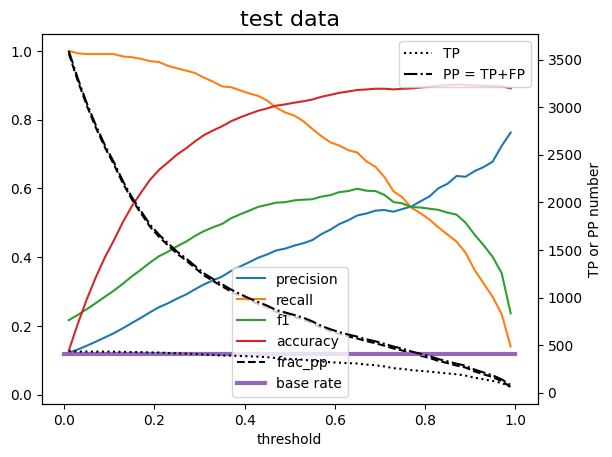

In [90]:
fig = plt.figure()
ax1 = plt.subplot(111)

ax1.plot(result[0], result[1], label='precision')
ax1.plot(result[0], result[2], label='recall')
ax1.plot(result[0], result[3], label='f1')
ax1.plot(result[0], result[4], label='accuracy')
ax1.plot(result[0], result[5], label='frac_pp', ls='--', c='black')
ax1.plot([0, 1], [0.117, 0.117], lw=3, label = 'base rate')

ax2 = ax1.twinx()
ax2.plot(result[0], result[7], label='TP', c='black', ls=':')
ax2.plot(result[0], result[6], label='PP = TP+FP', c='black', ls='-.')



ax1.legend()
ax2.legend()


ax1.set_xlabel('threshold')
ax2.set_ylabel('TP or PP number')


plt.title('test data',fontsize=16)


# when using "balanced class", if needing N=500, then use PP=500, find the threshold of 0.71, the precision is ~0.54, much higher than the base rate 0.12.  recall ~ 0.63. 

almost no change from all 48 features:auc-prc: 0.572  aucroc: 0.909

cunsum_threshold = 0.8, 21 features - auc-prc: 0.572  aucroc: 0.908,  
[7.10000000e-01 5.36964981e-01 6.33027523e-01 5.81052632e-01
  8.89964059e-01 1.42106718e-01 5.14000000e+02 2.76000000e+02]

cunsum_threshold = 0.5, 7 feataures, auc-prc: 0.548 aucroc: 0.891
  [6.90000000e-01 5.23622047e-01 6.10091743e-01 5.63559322e-01
  8.86093448e-01 1.40447885e-01 5.08000000e+02 2.66000000e+02]

cunsum_threshold = 0.3,  2 features,auc-prc: 0.447   aucroc: 0.851
[6.70000000e-01 4.42655936e-01 5.04587156e-01 4.71596999e-01
  8.63699198e-01 1.37406691e-01 4.97000000e+02 2.20000000e+02]

Text(0.5, 1.0, 'Precision-Recall curve, AUC_PRC=0.572')

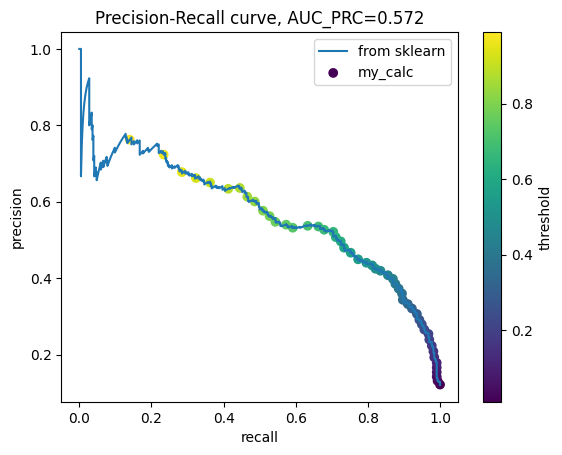

In [91]:
from sklearn.metrics import auc, precision_recall_curve

fig = plt.figure()
precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)


plt.plot(recall, precision, label='from sklearn')
sc = plt.scatter( result[2], result[1], c=result[0], label='my_calc')
cb = fig.colorbar(sc, label='threshold')

auc_prc = auc(recall, precision)

plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision-Recall curve, AUC_PRC=' + str(round(auc_prc,3)) )

In [92]:
# ROC_AUC:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_test_proba1)
roc_auc

0.9081934306043048

Text(0.5, 1.0, 'ROC: Receiver Operating Characteristic, ROC_AUC:0.908')

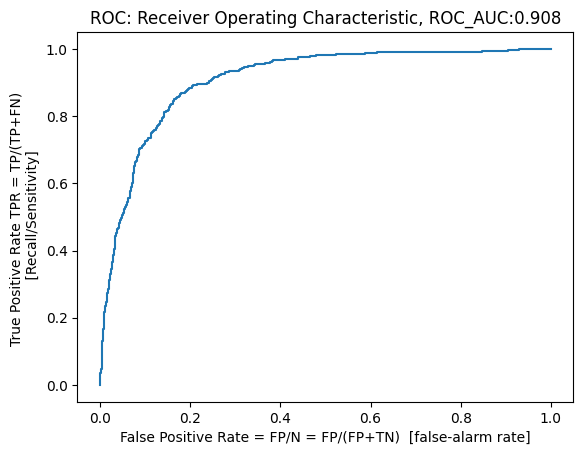

In [93]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate = FP/N = FP/(FP+TN)  [false-alarm rate]')
plt.ylabel('True Positive Rate TPR = TP/(TP+FN) \n [Recall/Sensitivity]')
plt.title('ROC: Receiver Operating Characteristic, ROC_AUC:'+ str(round(roc_auc,3)))

# Note:  ROC_AUC may not be very sensitive for imbalanced data, use PRC_AUC.

Text(0.5, 1.0, 'all variables')

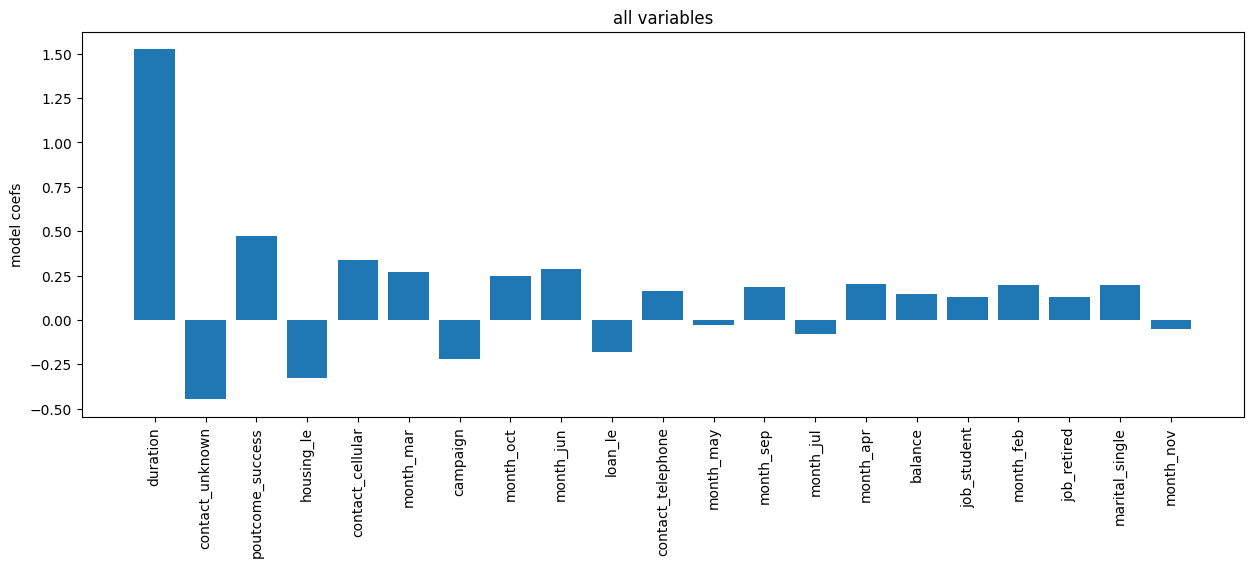

In [94]:
columns = selected_features
from matplotlib.pylab import plt
fig = plt.figure(figsize=(15,5))
plt.bar(range(len(model['lg'].coef_[0, :])), model['lg'].coef_[0, :]) 
plt.xticks(range(len(model['lg'].coef_[0, :])), columns, rotation=90)
plt.ylabel('model coefs')
plt.title('all variables')

In [95]:
result = []
cumsum_thresholds = np.arange(1.0, 0.2, -0.1)

for cumsum_threshold in cumsum_thresholds:
    print(cumsum_threshold)
    features = feature_importance.features[feature_importance['coef_abs_cumsum_pct']<cumsum_threshold]
    selected_features = features = list(features)


    steps = [
        ('rdt', RawDataTransformer()),
        ('fs', FeatureSelector(selected_features = selected_features)),
        ('scale', StandardScaler()),
        ('lg', LogisticRegression(
            class_weight='balanced', 
            random_state=15, n_jobs=-1, max_iter=200)),
    ]

    model=Pipeline(steps)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    n_features = model['lg'].n_features_in_

    y_test_proba = model.predict_proba(X_test)
    y_test_proba1 = y_test_proba[ :, 1 ]
    precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)
    auc_prc = auc(recall, precision)
    roc_auc = roc_auc_score(y_test, y_test_proba1)

    result.append([cumsum_threshold, n_features, auc_prc, roc_auc])

result = np.array(result).T



1.0
0.9
0.8
0.7000000000000001
0.6000000000000001
0.5000000000000001
0.40000000000000013
0.30000000000000016


In [96]:
result 

array([[ 1.        ,  0.9       ,  0.8       ,  0.7       ,  0.6       ,
         0.5       ,  0.4       ,  0.3       ],
       [47.        , 29.        , 21.        , 15.        , 11.        ,
         7.        ,  4.        ,  2.        ],
       [ 0.57218151,  0.57291321,  0.57187749,  0.56605673,  0.5629849 ,
         0.5476914 ,  0.53528837,  0.44749551],
       [ 0.90898656,  0.90837297,  0.90819343,  0.90342602,  0.900879  ,
         0.89149343,  0.88081506,  0.85148416]])

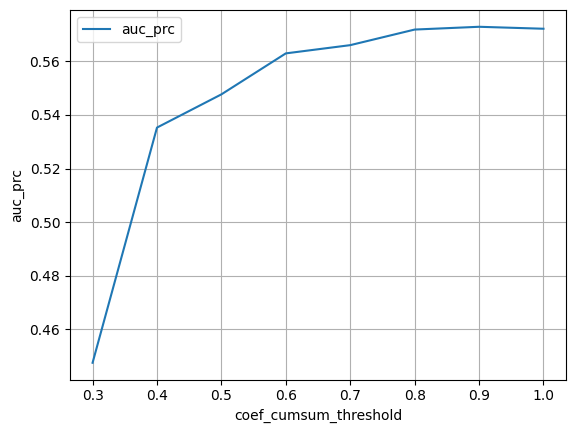

In [97]:

plt.plot(result[0], result[2], label='auc_prc')

#plt.plot(result[0], result[3], label='auc_roc')
plt.xlabel('coef_cumsum_threshold')
plt.ylabel('auc_prc')
plt.legend()
plt.grid()

## more features, more auc_prc. Reducing features would not make the results better. 

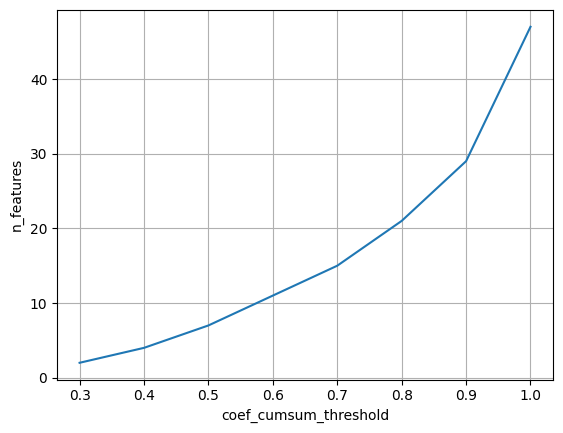

In [98]:
plt.plot(result[0], result[1], label='n_features')

plt.xlabel('coef_cumsum_threshold')
plt.ylabel('n_features')
plt.grid()

## final model

In [99]:
# raw features, target
train['y_num'] = train.y.map(lambda x: 1 if x=='yes' else 0)
test['y_num'] = test.y.map(lambda x: 1 if x=='yes' else 0)


raw_features = cat_cols + num_cols
target = 'y_num'


X_train = train[raw_features]
y_train = train[target]

X_test = test[raw_features]
y_test = test[target]




In [100]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
9419,36,unemployed,married,secondary,no,1453,no,no,unknown,6,jun,386,1,-1,0,unknown,no,0
26837,31,admin.,married,secondary,no,2304,yes,no,cellular,20,nov,257,2,-1,0,unknown,no,0
25178,57,management,divorced,tertiary,no,236,no,no,cellular,18,nov,120,2,-1,0,unknown,no,0
17148,31,entrepreneur,married,tertiary,no,5156,yes,no,cellular,28,jul,147,3,-1,0,unknown,no,0
17412,38,blue-collar,single,unknown,no,-933,yes,no,cellular,28,jul,149,11,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,39,technician,single,unknown,no,75,no,no,unknown,6,jun,26,1,-1,0,unknown,no,0
11190,55,blue-collar,married,primary,no,761,no,no,unknown,18,jun,67,1,-1,0,unknown,no,0
26569,39,management,married,tertiary,no,2450,no,no,cellular,20,nov,382,2,-1,0,unknown,no,0
9256,51,technician,married,primary,no,223,yes,no,unknown,5,jun,131,3,-1,0,unknown,no,0


In [101]:
## fine tune the hyperparameters.  GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA

cunsum_threshold = 1.01
features = feature_importance.features[feature_importance['coef_abs_cumsum_pct']<cunsum_threshold]
selected_features = features = list(features)

steps = [
    ('rdt', RawDataTransformer()),
    ('fs', FeatureSelector(selected_features = selected_features)),
    ('scale', StandardScaler()),
   # ('pca', PCA()),
    ('lg', LogisticRegression(
        #class_weight='balanced', 
        random_state=15, n_jobs=-1, max_iter=200)),
]

model=Pipeline(steps)

params = {
   # 'pca__n_components': [None, 45, 42],
   # 'lg__penalty': ['l2', None],
    'lg__C': [ 2e-3, 5e-3, 8e-3, ],
    'lg__class_weight': [None, 'balanced'],
    'lg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

# best_params = {'lg__C': 0.005, 'lg__class_weight': None, 'lg__solver': 'liblinear'}

n_splits = 5
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

grid=GridSearchCV(model, params , cv=cv, 
                  scoring = 'average_precision', # average_precision is pr_auc!!! #'roc_auc', 
                  n_jobs=-1
                 )


grid.fit(X_train, y_train)



/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rdt',
                                        <__main__.RawDataTransformer object at 0x13f99ebf0>),
                                       ('fs',
                                        <__main__.FeatureSelector object at 0x13f99ee90>),
                                       ('scale', StandardScaler()),
                                       ('lg',
                                        LogisticRegression(max_iter=200,
                                                           n_jobs=-1,
                                                           random_state=15))]),
             n_jobs=-1,
             param_grid={'lg__C': [0.002, 0.005, 0.008],
                         'lg__class_weight': [None, 'balanced'],
                         'lg__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                        'newton-cholesky', 'sag', 'saga']},
             scoring='average_precision')

In [102]:
#import sklearn
#sklearn.metrics.get_scorer_names()

In [103]:
cv_results = pd.DataFrame(grid.cv_results_)
print ('cv_results.mean_test_score.max(): %.3f'%cv_results.mean_test_score.max())
#for cumsun_threshold=1.0 (48 features).  cv_results.mean_test_score.max(): 0.552
#for cumsun_threshold=0.8 (21 features), cv_results.mean_test_score.max(): 0.549


cv_results.mean_test_score.max(): 0.552


Text(0, 0.5, 'PR_AUC- 5 fold cross-validation')

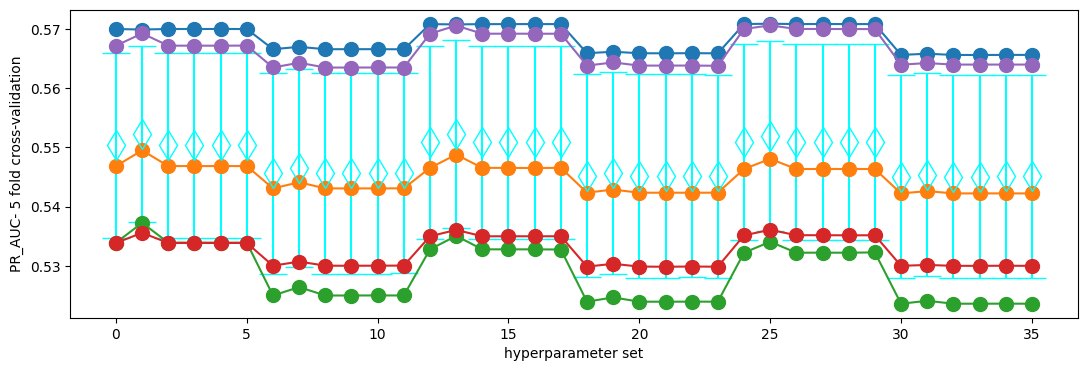

In [104]:
plt.figure(figsize=(13,4))
plt.errorbar(cv_results.index, cv_results.mean_test_score,
             yerr =cv_results.std_test_score,
             fmt='d' ,c='cyan', markersize=15, capsize=10, markerfacecolor='None'
            )

for i in range(n_splits):
    plt.scatter(cv_results.index, cv_results['split'+str(i)+'_test_score'], s=50)
    plt.plot(cv_results.index, cv_results['split'+str(i)+'_test_score'], markersize=10, marker='o')

plt.xlabel('hyperparameter set')
plt.ylabel('PR_AUC- 5 fold cross-validation')


In [105]:
grid.best_params_

{'lg__C': 0.002, 'lg__class_weight': None, 'lg__solver': 'liblinear'}

In [106]:
y_test_pred = grid.predict(X_test)

y_test_proba = grid.predict_proba(X_test)
y_test_proba1 = y_test_proba[ :, 1 ]
precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)
auc_prc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_test_proba1)
print(auc_prc, roc_auc)
# #for cumsun_threshold=1.01.  0.5565234005522852 0.9100585723957852
# #for cumsun_threshold=0.8. 0.5505951871327397 0.9072211613681782

0.5561866364357902 0.9104398951800846


In [107]:
threshold

array([0.00433904, 0.00789154, 0.00795047, ..., 0.99864313, 0.99964384,
       0.99981171])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Best-performance model. Precision-Recall curve, AUC_PRC=0.556')

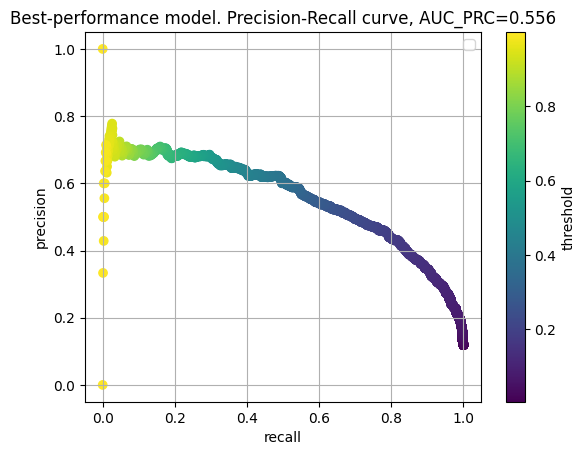

In [108]:
from sklearn.metrics import auc, precision_recall_curve

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
threshold1 = list(threshold)+ [threshold[-1]]
sc = plt.scatter(recall, precision, c=threshold1) #, label='my_calc')
cb = fig.colorbar(sc, label='threshold')

plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.title('Best-performance model. Precision-Recall curve, AUC_PRC=' + str(round(auc_prc,3)) )

Text(0.5, 1.0, 'Best-performance model. AUC_PRC=0.556')

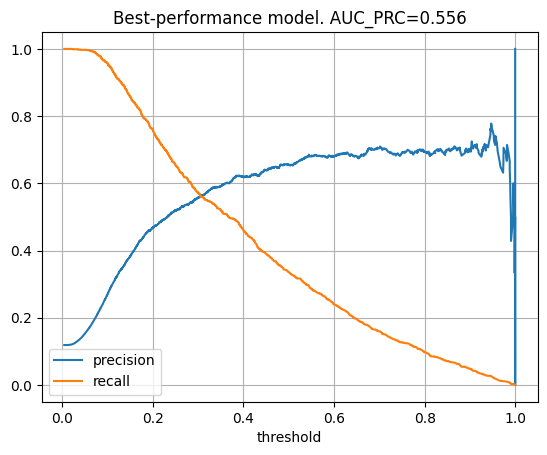

In [109]:
from sklearn.metrics import auc, precision_recall_curve

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
plt.plot(threshold1, precision, label='precision')
plt.plot(threshold1, recall, label='recall')       

plt.legend()
plt.xlabel('threshold')
plt.grid()
plt.title('Best-performance model. AUC_PRC=' + str(round(auc_prc,3)) )

In [110]:
# this is how to access individual steps and its attributes of GridSearchCV. 
grid.best_estimator_['lg'].n_features_in_
grid.best_estimator_['scale'].feature_names_in_
#grid.best_estimator_['lg'].feature_names_in_ # becaus of using standardscaler, it returns an array instead of dataframe, so feature_names are lost.

array(['duration', 'contact_unknown', 'poutcome_success', 'housing_le',
       'contact_cellular', 'month_mar', 'campaign', 'month_oct',
       'month_jun', 'loan_le', 'contact_telephone', 'month_may',
       'month_sep', 'month_jul', 'month_apr', 'balance', 'job_student',
       'month_feb', 'job_retired', 'marital_single', 'month_nov', 'pdays',
       'job_blue-collar', 'month_jan', 'poutcome_failure',
       'poutcome_unknown', 'marital_married', 'month_aug',
       'education_primary', 'education_unknown', 'job_entrepreneur',
       'job_admin.', 'month_dec', 'previous', 'job_services',
       'education_tertiary', 'job_unknown', 'job_management',
       'default_le', 'marital_divorced', 'job_housemaid',
       'poutcome_other', 'day', 'job_unemployed', 'age',
       'job_self-employed', 'education_secondary', 'job_technician'],
      dtype=object)

In [111]:
X_train

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
9419,unemployed,married,secondary,no,no,no,unknown,jun,unknown,36,1453,6,386,1,-1,0
26837,admin.,married,secondary,no,yes,no,cellular,nov,unknown,31,2304,20,257,2,-1,0
25178,management,divorced,tertiary,no,no,no,cellular,nov,unknown,57,236,18,120,2,-1,0
17148,entrepreneur,married,tertiary,no,yes,no,cellular,jul,unknown,31,5156,28,147,3,-1,0
17412,blue-collar,single,unknown,no,yes,no,cellular,jul,unknown,38,-933,28,149,11,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,technician,single,unknown,no,no,no,unknown,jun,unknown,39,75,6,26,1,-1,0
11190,blue-collar,married,primary,no,no,no,unknown,jun,unknown,55,761,18,67,1,-1,0
26569,management,married,tertiary,no,no,no,cellular,nov,unknown,39,2450,20,382,2,-1,0
9256,technician,married,primary,no,yes,no,unknown,jun,unknown,51,223,5,131,3,-1,0


In [112]:
from sklearn.decomposition import PCA
X_train_rdt = grid.best_estimator_['rdt'].transform(X_train)
X_train_rdt1 = grid.best_estimator_['fs'].transform(X_train_rdt)
X_train_rdt_scale = grid.best_estimator_['scale'].transform(X_train_rdt1)
pca = PCA(n_components = 48)
pca.fit(X_train_rdt_scale)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[7.66821716e-02 6.01229645e-02 5.18861494e-02 4.51284304e-02
 3.69733927e-02 3.24600136e-02 3.07155499e-02 2.93453708e-02
 2.78793221e-02 2.68802603e-02 2.57962464e-02 2.47262125e-02
 2.45352036e-02 2.37838168e-02 2.35976424e-02 2.32281649e-02
 2.25443911e-02 2.24305223e-02 2.16808425e-02 2.15265992e-02
 2.14145746e-02 2.10950582e-02 2.09361863e-02 2.08767613e-02
 2.06954701e-02 2.01625755e-02 1.95615614e-02 1.88394892e-02
 1.86762207e-02 1.82248229e-02 1.78986903e-02 1.73226625e-02
 1.66966491e-02 1.62319905e-02 1.55811162e-02 1.34134332e-02
 1.26077381e-02 1.00840501e-02 9.47322636e-03 8.46385119e-03
 6.83000615e-03 2.99059925e-03 7.58923636e-30 2.43049504e-31
 1.95063600e-31 1.91065147e-31 1.38771699e-31 7.89169155e-32]
[3.64863204e+02 3.23074781e+02 3.00129432e+02 2.79903275e+02
 2.53353855e+02 2.37387155e+02 2.30920247e+02 2.25710970e+02
 2.20000653e+02 2.16022805e+02 2.11622151e+02 2.07186600e+02
 2.06384795e+02 2.03199971e+02 2.02403106e+02 2.00812303e+02
 1.97834541e+02 1.97334

In [113]:
grid.best_estimator_['lg'].n_features_in_

48

Text(0.5, 1.0, 'all variables, final model')

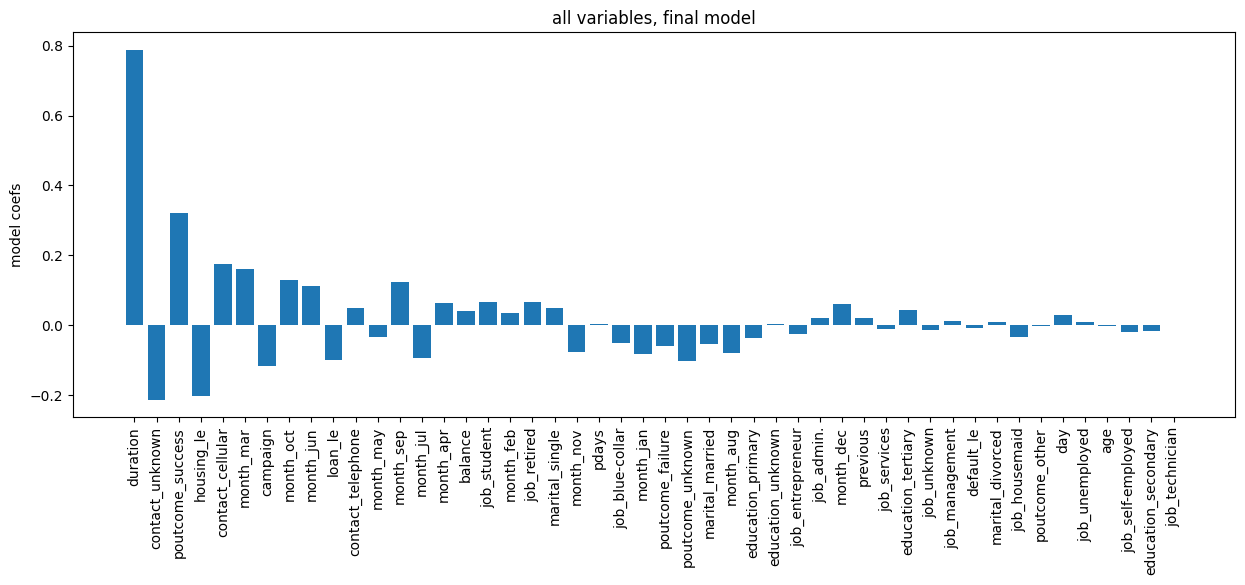

In [114]:
columns = selected_features
from matplotlib.pylab import plt
fig = plt.figure(figsize=(15,5))
plt.bar(range(len(grid.best_estimator_['lg'].coef_[0, :])), grid.best_estimator_['lg'].coef_[0, :]) 
plt.xticks(range(len(grid.best_estimator_['lg'].coef_[0, :])), columns, rotation=90)
plt.ylabel('model coefs')
plt.title('all variables, final model')

In [115]:
df2_corr = df2.corr()
df2_corr
len_corr = len(df2_corr)
plt.figure(figsize=(15,5))
plt.bar(range(len_corr-1), df2_corr.y_num[:len_corr-1])
plt.xticks(range(len_corr-1), df2_corr.y_num[:len_corr-1].index, rotation = 90)
plt.title('linear correlation coefs to y ', fontsize=22)

NameError: name 'df2' is not defined

0.10.1


Counter({0: 31952, 1: 31952})

In [937]:
## try SHAP
import shap

explainer = shap.explainers.Exact(grid.best_estimator_['lg'].predict, X_train_rdt_scale)

shap_values = explainer(X_train_rdt_scale[:])

shap.plots.bar(shap_values)

ValueError: It takes 70368744177664 masked evaluations to run the Exact explainer on this instance, but max_evals=100000!

# 

# final model with smote -- for this dataset using smote did not improve the score, but make the score lower.

In [997]:
# raw features, target
train['y_num'] = train.y.map(lambda x: 1 if x=='yes' else 0)
test['y_num'] = test.y.map(lambda x: 1 if x=='yes' else 0)


raw_features = cat_cols + num_cols
target = 'y_num'


X_train = train[raw_features]
y_train = train[target]

X_test = test[raw_features]
y_test = test[target]




In [998]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
9419,36,unemployed,married,secondary,no,1453,no,no,unknown,6,jun,386,1,-1,0,unknown,no,0
26837,31,admin.,married,secondary,no,2304,yes,no,cellular,20,nov,257,2,-1,0,unknown,no,0
25178,57,management,divorced,tertiary,no,236,no,no,cellular,18,nov,120,2,-1,0,unknown,no,0
17148,31,entrepreneur,married,tertiary,no,5156,yes,no,cellular,28,jul,147,3,-1,0,unknown,no,0
17412,38,blue-collar,single,unknown,no,-933,yes,no,cellular,28,jul,149,11,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,39,technician,single,unknown,no,75,no,no,unknown,6,jun,26,1,-1,0,unknown,no,0
11190,55,blue-collar,married,primary,no,761,no,no,unknown,18,jun,67,1,-1,0,unknown,no,0
26569,39,management,married,tertiary,no,2450,no,no,cellular,20,nov,382,2,-1,0,unknown,no,0
9256,51,technician,married,primary,no,223,yes,no,unknown,5,jun,131,3,-1,0,unknown,no,0


In [1057]:
## fine tune the hyperparameters.  GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA

import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.pipeline import Pipeline as imbpipeline

cunsum_threshold = 1.01
features = feature_importance.features[feature_importance['coef_abs_cumsum_pct']<cunsum_threshold]
selected_features = features = list(features)

steps = [
    ('rdt', RawDataTransformer()),
    ('fs', FeatureSelector(selected_features = selected_features)),
    ('smote', SMOTE(random_state=11)),
    ('scale', StandardScaler()),
   # ('pca', PCA()),
    ('lg', LogisticRegression(
        #class_weight='balanced', 
        random_state=15, n_jobs=-1, max_iter=200)),
]

model=imbpipeline(steps)

params = {
   # 'pca__n_components': [None, 45, 42],
   # 'lg__penalty': ['l2', None],
    'lg__C': [ 0.04, 0.08, 0.1, ],
   # 'lg__class_weight': [None, 'balanced'],
    'lg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

n_splits = 5
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

grid=GridSearchCV(model, params , cv=cv, 
                  scoring = 'average_precision', # average_precision is pr_auc!!! #'roc_auc', 
                  n_jobs=-1
                 )


grid.fit(X_train, y_train)



/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rdt',
                                        <__main__.RawDataTransformer object at 0x1779f7820>),
                                       ('fs',
                                        <__main__.FeatureSelector object at 0x2a163dae0>),
                                       ('smote', SMOTE(random_state=11)),
                                       ('scale', StandardScaler()),
                                       ('lg',
                                        LogisticRegression(max_iter=200,
                                                           n_jobs=-1,
                                                           random_state=15))]),
             n_jobs=-1,
             param_grid={'lg__C': [0.04, 0.08, 0.1],
                         'lg__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                        'newton-cholesky', 'sag', 'saga']},
             scoring='average_precision')

In [1058]:
#import sklearn
#sklearn.metrics.get_scorer_names()

In [1059]:
cv_results = pd.DataFrame(grid.cv_results_)
print ('cv_results.mean_test_score.max(): %.3f'%cv_results.mean_test_score.max())
#for cumsun_threshold=1.0 (48 features).  cv_results.mean_test_score.max(): 0.552
#for cumsun_threshold=0.8 (21 features), cv_results.mean_test_score.max(): 0.549


cv_results.mean_test_score.max(): 0.530


Text(0, 0.5, 'PR_AUC- 5 fold cross-validation')

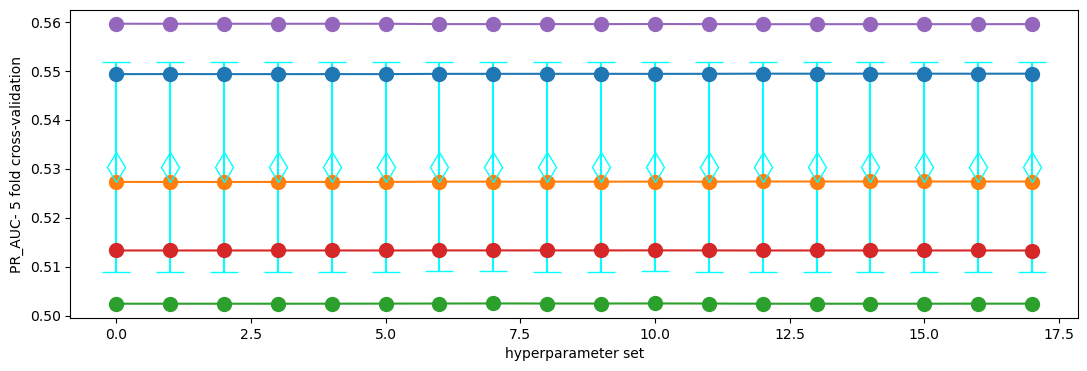

In [1060]:
plt.figure(figsize=(13,4))
plt.errorbar(cv_results.index, cv_results.mean_test_score,
             yerr =cv_results.std_test_score,
             fmt='d' ,c='cyan', markersize=15, capsize=10, markerfacecolor='None'
            )

for i in range(n_splits):
    plt.scatter(cv_results.index, cv_results['split'+str(i)+'_test_score'], s=50)
    plt.plot(cv_results.index, cv_results['split'+str(i)+'_test_score'], markersize=10, marker='o')

plt.xlabel('hyperparameter set')
plt.ylabel('PR_AUC- 5 fold cross-validation')


In [1061]:
grid.best_params_

{'lg__C': 0.08, 'lg__solver': 'sag'}

In [1062]:
y_test_pred = grid.predict(X_test)

y_test_proba = grid.predict_proba(X_test)
y_test_proba1 = y_test_proba[ :, 1 ]
precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)
auc_prc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_test_proba1)
print(auc_prc, roc_auc)
# #for cumsun_threshold=1.01.  0.5565234005522852 0.9100585723957852
# #for cumsun_threshold=0.8. 0.5505951871327397 0.9072211613681782

0.5391714431867853 0.8968200883789514


In [1063]:
threshold

array([2.85359155e-06, 1.37574429e-05, 1.43482853e-05, ...,
       9.99999867e-01, 9.99999941e-01, 9.99999999e-01])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Best-performance model. Precision-Recall curve, AUC_PRC=0.539')

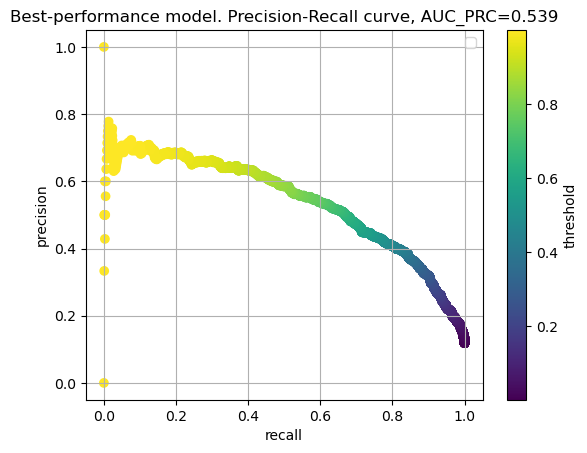

In [1064]:
from sklearn.metrics import auc, precision_recall_curve

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
threshold1 = list(threshold)+ [threshold[-1]]
sc = plt.scatter(recall, precision, c=threshold1) #, label='my_calc')
cb = fig.colorbar(sc, label='threshold')

plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.title('Best-performance model. Precision-Recall curve, AUC_PRC=' + str(round(auc_prc,3)) )

Text(0.5, 1.0, 'Best-performance model. AUC_PRC=0.539')

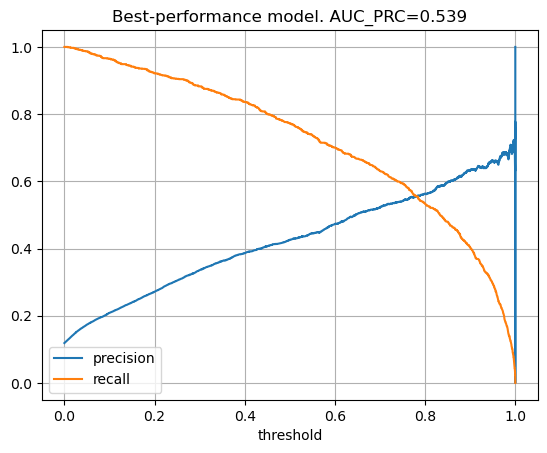

In [1065]:
from sklearn.metrics import auc, precision_recall_curve

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
plt.plot(threshold1, precision, label='precision')
plt.plot(threshold1, recall, label='recall')       

plt.legend()
plt.xlabel('threshold')
plt.grid()
plt.title('Best-performance model. AUC_PRC=' + str(round(auc_prc,3)) )

In [1066]:
# this is how to access individual steps and its attributes of GridSearchCV. 
print(grid.best_estimator_['smote'].n_features_in_)
grid.best_estimator_['smote'].feature_names_in_
#grid.best_estimator_['lg'].feature_names_in_ # becaus of using standardscaler, it returns an array instead of dataframe, so feature_names are lost.

48


array(['duration', 'contact_unknown', 'poutcome_success', 'housing_le',
       'contact_cellular', 'month_mar', 'campaign', 'month_oct',
       'month_jun', 'loan_le', 'contact_telephone', 'month_may',
       'month_sep', 'month_jul', 'month_apr', 'balance', 'job_student',
       'month_feb', 'job_retired', 'marital_single', 'month_nov', 'pdays',
       'job_blue-collar', 'month_jan', 'poutcome_failure',
       'poutcome_unknown', 'marital_married', 'month_aug',
       'education_primary', 'education_unknown', 'job_entrepreneur',
       'job_admin.', 'month_dec', 'previous', 'job_services',
       'education_tertiary', 'job_unknown', 'job_management',
       'default_le', 'marital_divorced', 'job_housemaid',
       'poutcome_other', 'day', 'job_unemployed', 'age',
       'job_self-employed', 'education_secondary', 'job_technician'],
      dtype=object)

In [1069]:
grid.best_estimator_['lg'].coef_

array([[ 9.18493780e-01, -2.91473826e-01,  3.44028334e-01,
        -2.50016594e-01,  2.36822302e-01,  1.78148812e-01,
        -1.73047538e-01,  1.41613159e-01,  1.66497040e-01,
        -1.23010002e-01,  7.71427485e-02, -2.87822091e-02,
         1.36404749e-01, -1.22823117e-01,  7.19340586e-02,
         4.37993779e-02,  7.22193622e-02,  4.28938600e-02,
         7.82692360e-02,  5.69256816e-02, -9.83026763e-02,
        -4.02029213e-03, -6.04475933e-02, -1.05569440e-01,
        -6.17152640e-02, -1.09497331e-01, -6.17794568e-02,
        -9.68690597e-02, -4.56167169e-02,  6.44915644e-03,
        -2.88709213e-02,  2.98699419e-02,  6.38375204e-02,
         2.30134967e-02, -1.12982954e-02,  5.34742370e-02,
        -1.41373391e-02,  1.34852563e-02, -6.68138515e-03,
         1.44474222e-02, -4.25893026e-02, -8.59269847e-04,
         4.82240043e-02,  9.59946778e-03, -5.77548452e-03,
        -2.27899295e-02, -1.86088332e-02,  4.21950682e-03]])

In [1091]:
# linear correlation coefs of the variables to y:
df2 = grid.best_estimator_['fs'].transform(grid.best_estimator_['rdt'].transform(df))
df2['y_num'] = df.y.map(lambda x: 1 if x=='yes' else 0)
df2

,duration,contact_unknown,poutcome_success,housing_le,contact_cellular,month_mar,campaign,month_oct,month_jun,loan_le,...,marital_divorced,job_housemaid,poutcome_other,day,job_unemployed,age,job_self-employed,education_secondary,job_technician,y_num
0,261,1.0,0.0,1,0.0,0.0,1,0.0,0.0,0,...,0.0,0.0,0.0,5,0.0,58,0.0,0.0,0.0,0
1,151,1.0,0.0,1,0.0,0.0,1,0.0,0.0,0,...,0.0,0.0,0.0,5,0.0,44,0.0,1.0,1.0,0
2,76,1.0,0.0,1,0.0,0.0,1,0.0,0.0,1,...,0.0,0.0,0.0,5,0.0,33,0.0,1.0,0.0,0
3,92,1.0,0.0,1,0.0,0.0,1,0.0,0.0,0,...,0.0,0.0,0.0,5,0.0,47,0.0,0.0,0.0,0
4,198,1.0,0.0,0,0.0,0.0,1,0.0,0.0,0,...,0.0,0.0,0.0,5,0.0,33,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,977,0.0,0.0,0,1.0,0.0,3,0.0,0.0,0,...,0.0,0.0,0.0,17,0.0,51,0.0,0.0,1.0,1
45207,456,0.0,0.0,0,1.0,0.0,2,0.0,0.0,0,...,1.0,0.0,0.0,17,0.0,71,0.0,0.0,0.0,1
45208,1127,0.0,1.0,0,1.0,0.0,5,0.0,0.0,0,...,0.0,0.0,0.0,17,0.0,72,0.0,1.0,0.0,1
45209,508,0.0,0.0,0,0.0,0.0,4,0.0,0.0,0,...,0.0,0.0,0.0,17,0.0,57,0.0,1.0,0.0,0


,duration,contact_unknown,poutcome_success,housing_le,contact_cellular,month_mar,campaign,month_oct,month_jun,loan_le,...,marital_divorced,job_housemaid,poutcome_other,day,job_unemployed,age,job_self-employed,education_secondary,job_technician,y_num
duration,1.000000,-0.014379,0.042389,0.005075,0.025543,-0.005519,-0.084570,0.015076,-0.021426,-0.012412,...,0.006100,-0.008046,-0.001958,-0.030206,0.020322,-0.004648,0.007383,0.002084,-0.009176,0.394521
contact_unknown,-0.014379,1.000000,-0.114997,0.208409,-0.862398,-0.062325,0.004853,-0.062652,0.453077,-0.007211,...,0.016904,-0.004815,-0.124318,-0.034103,-0.018464,-0.020132,-0.015358,0.045659,-0.038252,-0.150935
poutcome_success,0.042389,-0.114997,1.000000,-0.091360,0.104665,0.053066,-0.057486,0.103269,-0.023068,-0.053713,...,-0.008490,-0.009375,-0.038300,-0.030321,0.015044,0.035526,0.001494,-0.024728,-0.002929,0.306788
housing_le,0.005075,0.208409,-0.091360,1.000000,-0.156071,-0.066284,-0.023599,-0.085439,-0.102298,0.041323,...,0.001778,-0.079380,0.039710,-0.027982,-0.048229,-0.185513,-0.027319,0.101659,-0.012823,-0.139173
contact_cellular,0.025543,-0.862398,0.104665,-0.156071,1.000000,0.048958,-0.032271,0.028856,-0.391732,0.013604,...,-0.006786,-0.015649,0.104321,0.020186,0.013007,-0.068375,0.015440,-0.031579,0.056982,0.135873
month_mar,-0.005519,-0.062325,0.053066,-0.066284,0.048958,1.000000,-0.018612,-0.013302,-0.037794,-0.029761,...,-0.004704,-0.000110,0.020364,-0.020749,0.006797,0.019499,-0.000777,-0.025897,-0.013405,0.129456
campaign,-0.084570,0.004853,-0.057486,-0.023599,-0.032271,-0.018612,1.000000,-0.051031,0.043893,0.009980,...,-0.015484,0.003097,-0.020107,0.162490,-0.018448,0.004760,0.005479,-0.020893,0.020739,-0.073172
month_oct,0.015076,-0.062652,0.103269,-0.085439,0.028856,-0.013302,-0.051031,1.000000,-0.047149,-0.030097,...,-0.003279,0.006155,0.027354,0.030514,0.001806,0.060116,0.000214,-0.023306,-0.008408,0.128531
month_jun,-0.021426,0.453077,-0.023068,-0.102298,-0.391732,-0.037794,0.043893,-0.047149,1.000000,-0.022749,...,0.011779,0.052663,-0.051110,-0.193807,0.002077,0.051768,0.009878,-0.020013,-0.037842,-0.016805
loan_le,-0.012412,-0.007211,-0.053713,0.041323,0.013604,-0.029761,0.009980,-0.030097,-0.022749,1.000000,...,0.016377,-0.017234,-0.009099,0.011370,-0.035961,-0.015655,-0.007882,0.070625,0.014798,-0.068185


Text(0.5, 1.0, 'linear correlation coefs to y ')

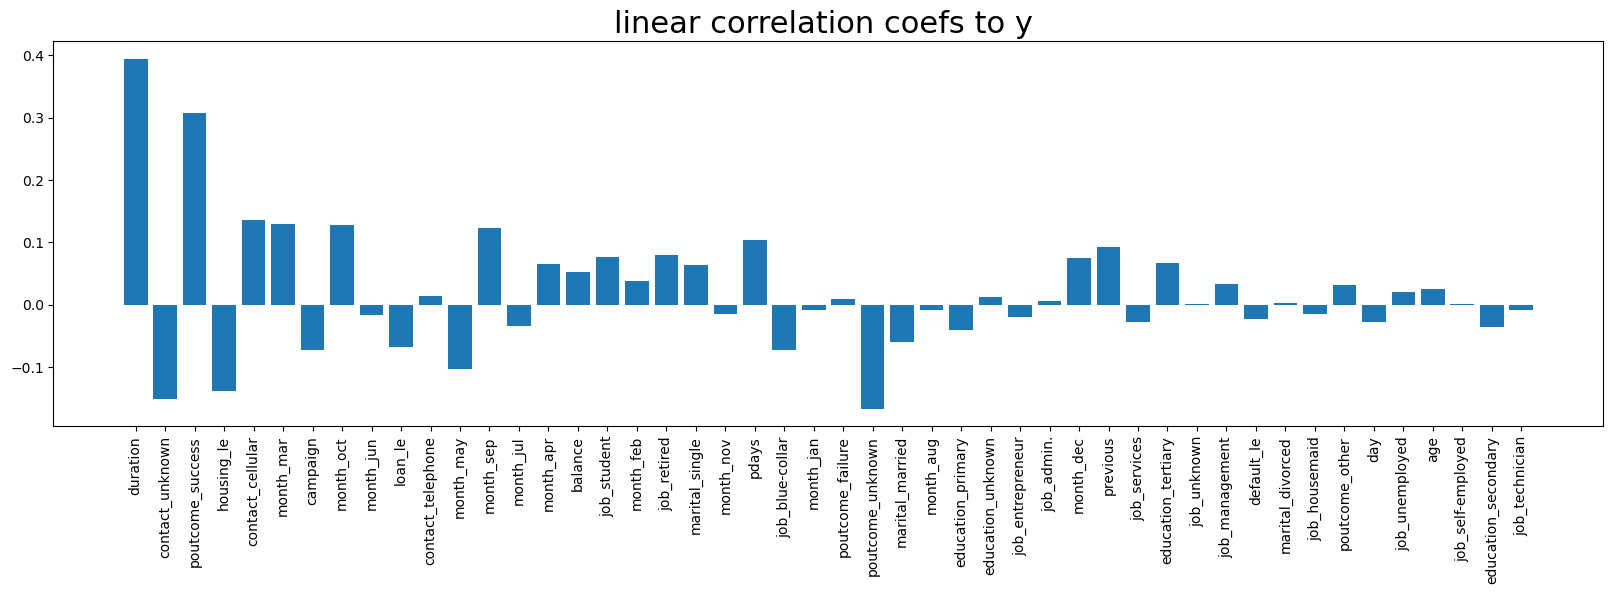

## other to-do:
## -- decide on metrics - prc_auc. 
## -- tp, fp, tn, fn calculation.  --  done
## -- add both numeric and categorical variables - done
## -- chossing threshold for Logistic regression - done.

## -- ROC curve, ROC_AUC. -- done
## -- read notebook of logistic regression. -- done.
## -- remove unimportant features, see if results improve. -- done. wouldn't improve. 
## -- what are the hyperparameters, fine-tune them and use gridsearchcv  to find best scores. -- done
## -- use the whole train and test data set
## -- pca?  tried, having fewer n_components would not help with the score (pr_auc). 
## -- smote for imbalanced class? tried for this dataset, using smote did not make it better


## would take logs of some numeric variables help?
## -- SHAP?  exact calulator is too much calculation, using an estimator? do we need shap in a linear model like logistic regression? 
## -- svm, random forest, cnn, naive bayes.
## -- evaluate best models
## -- recommendations to product manager. what are important features? which customer groups to further post ads. 
## -- iterative? 

## Conclusion:
## -- metric: auc_prc.  this is most fair for imbalanced data, and is not threshold-dependent.
## when using all variables it get the best, though no improvement after n>~21 features (ranked by coeffients).

## summary:
-- streamline machinary: 
   -- how many numeric variables? how many categorical? 
   -- how many missing values? what to do with them?  missing values analysis. coliniarity for numeric variables. 
   -- EDA: 
       -- imbalanced data type? 
       -- numeric variables: 
          -- univariate analysis: histogram (density plot) for the two target class. 
          -- multivariate analysis: correlation checks (colinearity).  
       -- for categorical variables:
          -- univariate analysis: bar plot, for the two target class. 
          -- multivariate analysis: correlation checks (colinearity).   ??? try do it? 
   -- DATA cleaning:
        -- for missing values: remove colums not so  informative? imputing? 
        -- for binary variables:  if one group is very infrequent. remove the column. 
        -- multiclass categorical variables: 
        -- for numeric variables. take logs?  remove features due to colinearity? 
        -- for categorical variables [one hot encoding, ordinal encoding, target encoding(k-fold, leave-on-out)]: group less frequent variables?(ordinal encoding can automatically do this) binary: ordinal encoding. obvious ordinal: ordinal encoding? multiclass but not so ordinal: one-hot encoding? what if too many values? group, use len, target encoding.  
        
   -- ML: 
       -- metric. benchmark. 
       -- for imbalanced data: try class_weight = balanced? upsampling/downsampling/SMOTE?   - may not need to decide at the beginning
       -- split samples into train & test
       -- futher split the train into train + validation
       -- simplest model to go through. no tune of hyperparameters. look at metric: any improvement from benchmark?
             - build a pipeline
           -- imputing
           -- data transformer: encoding
           -- feature selection - no need to do this in the beginning
           -- SCALE! 
           -- (pca)  try switch this on and off after the whole model is built.
           -- ML model. 
       -- if better than the benchmark, use gridsearchCV to finetune parameters and find best model for the metric.
       -- look at the feature importance (& compare with EDA). does it make sense? 
       
       -- try other models and use gridsearchCV to finetune parameters, 
       
       
       -- compare cv_mean_max_score to decide what final model to use.
       -- train the data set. predict the test dataset. evaluate generalizability. 
 
-- summary: 
   -- best model: how much better metrics compared to bench mark? 
   -- findings from the EDA: important features.  
 
-- notes:


## Q: 
## -- why both using only numeric or only categorical variables ended up having very similar precision?  
## -- would reducing unimportant features help with the score? using the score of auc-prc
## Is it worth the time fine-tuning it? 
## -- should I use PCA here? would it help?

## what threshold to choose? what does it (and relatd precision, recall score) mean? 